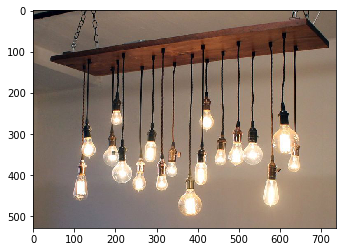

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from skimage.io import imread

img = imread('images/bulbs.jpg')
plt.imshow(img)

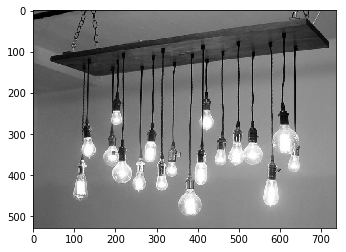

In [29]:
from skimage.color import rgb2gray
img_gray = rgb2gray(img)
plt.imshow(img_gray, 'gray')

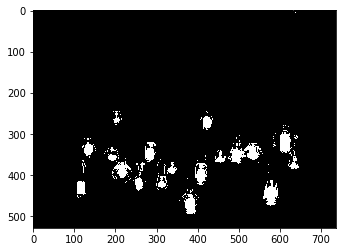

In [30]:
from skimage.filters import threshold_adaptive

img_tr = img_gray > 0.9
plt.imshow(img_tr, 'gray')

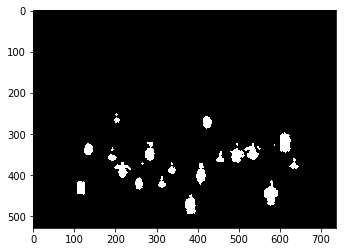

In [31]:
from skimage.morphology import disk, ball
from skimage.morphology import opening

str_elem = disk(2)
img_tr_open = opening(img_tr, selem=str_elem)
plt.imshow(img_tr_open, 'gray')

In [32]:
from skimage.measure import label
from skimage.measure import regionprops 

labeled_img = label(img_tr_open,8)
regions = regionprops(labeled_img)

In [33]:
def draw_regions(regs, img_size):
    img_r = np.ndarray((img_size[0], img_size[1]), dtype='float32')
    for reg in regs:
        coords = reg.coords
        for coord in coords:
            img_r[coord[0], coord[1]] = 1;

    return img_r

In [34]:
areas = []
for region in regions:
    x = region.area
    if x > 130:
        areas.append(region)
        

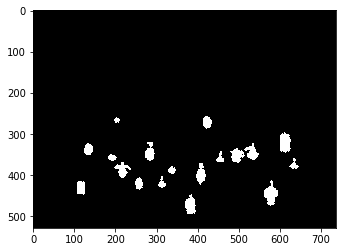

In [35]:
final_img = draw_regions(areas, img_tr_open.shape);
plt.imshow(final_img, 'gray')

In [36]:
print('Ukupan broj sijalica: {}'.format(len(areas)))

Ukupan broj sijalica: 18
